In [1]:
import os

os.chdir('C:/Users/user/Downloads/')

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

Воспользуемся данными titanic https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5

In [23]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Будем использовать только четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).

In [24]:
titanic = titanic.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

In [25]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0})

In [40]:
titanic['Age'].fillna((titanic['Age'].median()), inplace = True)

In [41]:
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
5,0,3,1,28.0,8.4583
6,0,1,1,54.0,51.8625
7,0,3,1,2.0,21.0750
8,1,3,0,27.0,11.1333
9,1,2,0,14.0,30.0708


In [30]:
X = titanic.iloc[:, 1:]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Обучим модель:

In [31]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=241, splitter='best')

Посмотрим на важности признаков:

In [33]:
list(zip(X.columns, clf.feature_importances_))

[('Pclass', 0.13609848371663208),
 ('Sex', 0.311480275033268),
 ('Age', 0.22111750996061708),
 ('Fare', 0.331303731289483)]

Видно, что наиболее важными являются признаки Sex и Fare

In [34]:
y_pred = clf.predict(X_test)
print ("AUC-ROC = ", roc_auc_score(y_test, y_pred))

AUC-ROC =  0.7410553410553411


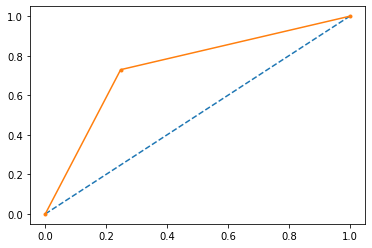

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()